In [1]:
%load_ext autotime
import numpy as np
from keras.layers import Input, Dense, Conv1D,MaxPooling1D,UpSampling1D ,K,AveragePooling1D ,LSTM,TimeDistributed,RepeatVector,CuDNNLSTM
from keras.models import Model,Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
a=np.genfromtxt('data_for_clustering.csv', delimiter=',')
a=a[:-1]
print(a[1])
x=a[:250*910]
x=x[20*250:]
x=x.reshape(-1,250)
me=np.mean(x,axis=1)
x=(x.T-me).T
x=x.reshape(890,250,1)
x.shape

39963.59


(890, 250, 1)

time: 2.42 s


In [5]:
n_in=250
model = Sequential()
model.add(Dense(250,activation='linear'))
model.add(LSTM(100, input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='tanh',recurrent_activation='tanh', return_sequences=True,dropout=0.9))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='rmsprop', loss='mse')

time: 20.9 ms


In [6]:
model.fit(x, x, epochs=5, verbose=1,batch_size=100)

Epoch 1/5


InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNN' used by node cu_dnnlstm_1/CudnnRNN (defined at C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\layers\cudnn_recurrent.py:517) with these attrs: [is_training=true, seed2=0, input_mode="linear_input", T=DT_FLOAT, dropout=0, rnn_mode="lstm", direction="unidirectional", seed=87654321]
Registered devices: [CPU]
Registered kernels:
  device='GPU'; T in [DT_HALF]
  device='GPU'; T in [DT_FLOAT]
  device='GPU'; T in [DT_DOUBLE]

	 [[node cu_dnnlstm_1/CudnnRNN (defined at C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\layers\cudnn_recurrent.py:517) ]]

Caused by op 'cu_dnnlstm_1/CudnnRNN', defined at:
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 708, in __init__
    self.run()
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3220, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-31c4d06d01ef>", line 1, in <module>
    model.fit(x, x, epochs=5, verbose=1,batch_size=100)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 952, in fit
    batch_size=batch_size)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 677, in _standardize_user_data
    self._set_inputs(x)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 589, in _set_inputs
    self.build(input_shape=(None,) + inputs.shape[1:])
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\sequential.py", line 221, in build
    x = layer(x)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\layers\recurrent.py", line 532, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\layers\cudnn_recurrent.py", line 90, in call
    output, states = self._process_batch(inputs, initial_state)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\layers\cudnn_recurrent.py", line 517, in _process_batch
    is_training=True)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\contrib\cudnn_rnn\python\ops\cudnn_rnn_ops.py", line 1636, in __call__
    input_data, input_h, input_c, params, is_training=is_training)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\contrib\cudnn_rnn\python\ops\cudnn_rnn_ops.py", line 1527, in __call__
    seed=self._seed)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\contrib\cudnn_rnn\python\ops\cudnn_rnn_ops.py", line 1014, in _cudnn_rnn
    outputs, output_h, output_c, _ = gen_cudnn_rnn_ops.cudnn_rnn(**args)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\gen_cudnn_rnn_ops.py", line 142, in cudnn_rnn
    seed2=seed2, is_training=is_training, name=name)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'CudnnRNN' used by node cu_dnnlstm_1/CudnnRNN (defined at C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\layers\cudnn_recurrent.py:517) with these attrs: [is_training=true, seed2=0, input_mode="linear_input", T=DT_FLOAT, dropout=0, rnn_mode="lstm", direction="unidirectional", seed=87654321]
Registered devices: [CPU]
Registered kernels:
  device='GPU'; T in [DT_HALF]
  device='GPU'; T in [DT_FLOAT]
  device='GPU'; T in [DT_DOUBLE]

	 [[node cu_dnnlstm_1/CudnnRNN (defined at C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\keras\layers\cudnn_recurrent.py:517) ]]


time: 1.98 s


In [ ]:
yhat = model.predict([[x[0]]], verbose=1)
print(yhat[0,:,0])

In [16]:
compressed_layer =2
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[compressed_layer].output])
compressed = get_3rd_layer_output([x])[0]

time: 1.34 s


In [18]:
compressed.shape

(890, 250, 100)

time: 2 ms


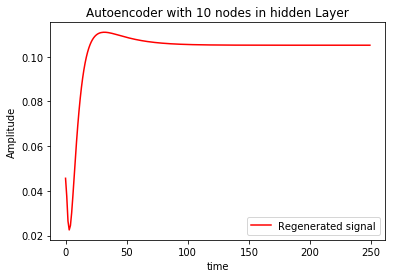

time: 141 ms


In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
q=700
plt.title('Autoencoder with 10 nodes in hidden Layer')
#plt.plot(range(250),x[q],label='original signal', color='b')
plt.plot(range(250),pred[q],label='Regenerated signal',color='r')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()
